In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Handle very large data

In [3]:
%%time

'''
check number of rows when there are too many rows

with open('train.csv') as csvfile:
    n_rows=len(csvfile.readlines())

print('Number of rows:', n_rows)
'''


CPU times: total: 0 ns
Wall time: 0 ns


"\ncheck number of rows when there are too many rows\n\nwith open('train.csv') as csvfile:\n    n_rows=len(csvfile.readlines())\n\nprint('Number of rows:', n_rows)\n"

In [4]:
%%time
train_df = pd.read_csv('train.csv', nrows=1000000)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   key                1000000 non-null  object 
 1   fare_amount        1000000 non-null  float64
 2   pickup_datetime    1000000 non-null  object 
 3   pickup_longitude   1000000 non-null  float64
 4   pickup_latitude    1000000 non-null  float64
 5   dropoff_longitude  999990 non-null   float64
 6   dropoff_latitude   999990 non-null   float64
 7   passenger_count    1000000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 61.0+ MB
CPU times: total: 984 ms
Wall time: 1.5 s


In [5]:
train_df = train_df.dropna(how='any',axis=0)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999990 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                999990 non-null  object 
 1   fare_amount        999990 non-null  float64
 2   pickup_datetime    999990 non-null  object 
 3   pickup_longitude   999990 non-null  float64
 4   pickup_latitude    999990 non-null  float64
 5   dropoff_longitude  999990 non-null  float64
 6   dropoff_latitude   999990 non-null  float64
 7   passenger_count    999990 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 68.7+ MB


In [6]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fare_amount,999990.0,11.347953,9.821790,-44.900000,6.000000,8.500000,12.500000,500.000000
pickup_longitude,999990.0,-72.526699,12.057778,-3377.680935,-73.992060,-73.981792,-73.967094,2522.271325
pickup_latitude,999990.0,39.929040,7.626087,-3116.285383,40.734965,40.752695,40.767154,2621.628430
dropoff_longitude,999990.0,-72.527860,11.324494,-3383.296608,-73.991385,-73.980135,-73.963654,45.581619
dropoff_latitude,999990.0,39.919954,8.201418,-3114.338567,40.734046,40.753166,40.768129,1651.553433
passenger_count,999990.0,1.684941,1.323907,0.000000,1.000000,1.000000,2.000000,208.000000


In [7]:
print('old size',len(train_df))
train_df = train_df[train_df['fare_amount']>0]
print('new size',len(train_df))

old size 999990
new size 999923


In [8]:
def haversine_distance(lon1, lat1, lon2, lat2):
    """
    Calculate the great-circle distance between two points 
    on the Earth specified by their longitude and latitude.
    
    Parameters:
    lon1, lat1 - longitude and latitude of point 1 (in decimal degrees)
    lon2, lat2 - longitude and latitude of point 2 (in decimal degrees)
    
    Returns:
    Distance in kilometers between point 1 and point 2
    """
    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    
    # Haversine formula
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)) 
    r = 6371  # Radius of Earth in kilometers
    distance = r * c
    return distance

train_df['distance_km'] = train_df.apply(lambda row: haversine_distance(row['pickup_longitude'], row['pickup_latitude'], row['dropoff_longitude'], row['dropoff_latitude']),axis=1)
train_df['distance_km'] = train_df['distance_km'].apply(round).astype(int)

In [9]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fare_amount,999923.0,11.348945,9.821201,0.010000,6.000000,8.500000,12.500000,500.000000
pickup_longitude,999923.0,-72.526826,12.057522,-3377.680935,-73.992060,-73.981792,-73.967095,2522.271325
pickup_latitude,999923.0,39.929108,7.626026,-3116.285383,40.734965,40.752695,40.767154,2621.628430
dropoff_longitude,999923.0,-72.528356,11.323010,-3383.296608,-73.991385,-73.980135,-73.963654,45.581619
dropoff_latitude,999923.0,39.920225,8.200913,-3114.338567,40.734047,40.753166,40.768129,1651.553433
passenger_count,999923.0,1.684955,1.323921,0.000000,1.000000,1.000000,2.000000,208.000000
distance_km,999923.0,19.033871,361.698479,0.000000,1.000000,2.000000,4.000000,16878.000000


<Axes: >

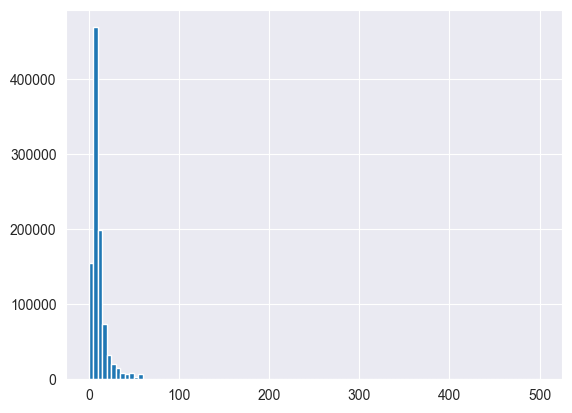

In [10]:
train_df['fare_amount'].hist(bins=100)

<Axes: >

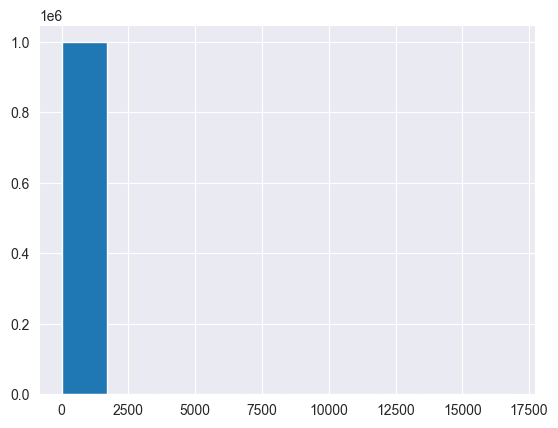

In [11]:
train_df['distance_km'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x21cbfb64340>,
 'caps': [<matplotlib.lines.Line2D at 0x21cbfb64880>,
 'boxes': [<matplotlib.lines.Line2D at 0x21cbfb640a0>],
 'medians': [<matplotlib.lines.Line2D at 0x21cbfb64dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21cbfb730a0>],
 'means': []}

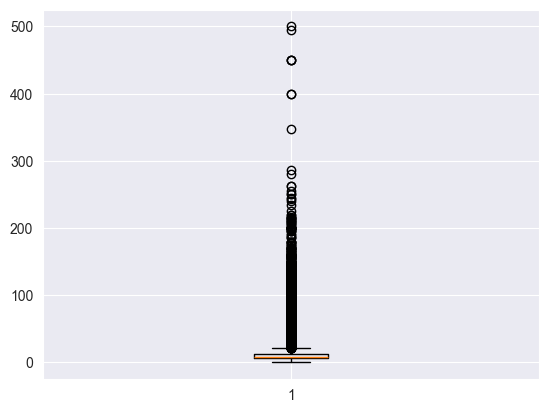

In [12]:
plt.boxplot(train_df['fare_amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x21cbff5e160>,
 'caps': [<matplotlib.lines.Line2D at 0x21cbff5e6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21cbff4de80>],
 'medians': [<matplotlib.lines.Line2D at 0x21cbff5ebe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21cbff5ee80>],
 'means': []}

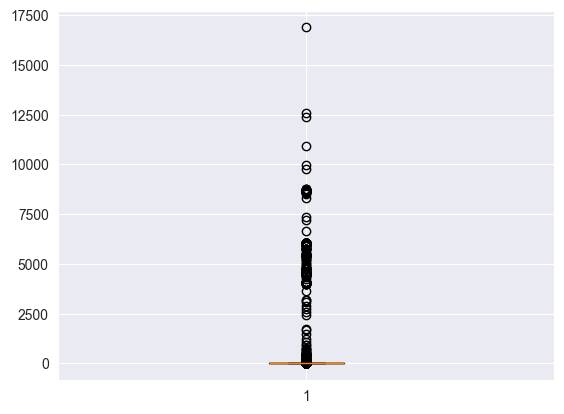

In [13]:
plt.boxplot(train_df['distance_km'])

{'whiskers': [<matplotlib.lines.Line2D at 0x21cc01102e0>,
 'caps': [<matplotlib.lines.Line2D at 0x21cc0110700>,
 'boxes': [<matplotlib.lines.Line2D at 0x21cc00fffd0>],
 'medians': [<matplotlib.lines.Line2D at 0x21cc0110c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x21cc0110ee0>],
 'means': []}

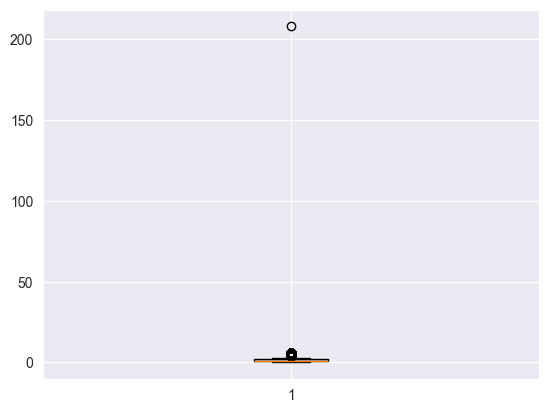

In [14]:
plt.boxplot(train_df['passenger_count'])

In [15]:
train_df['passenger_count'] = train_df['passenger_count'].apply(lambda x: x if x<=5 else 6)
train_df.groupby('passenger_count').agg({"passenger_count":"sum","passenger_count" : "size"})

,passenger_count
passenger_count,
0,3555
1,691292
2,148098
3,43762
4,21427
5,70593
6,21196


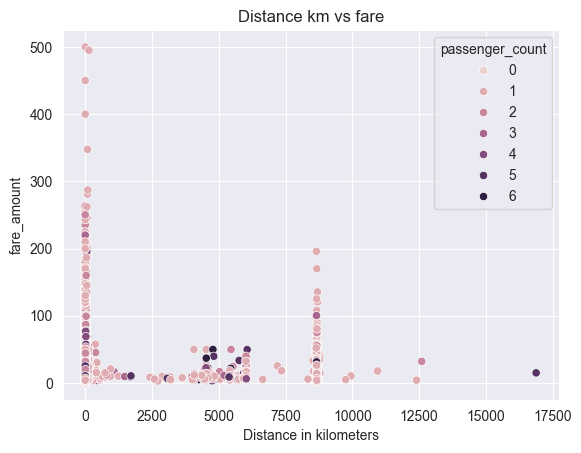

In [16]:
sns.scatterplot(x='distance_km', y='fare_amount', data=train_df,hue='passenger_count')
plt.title("Distance km vs fare")
plt.xlabel("Distance in kilometers")
plt.ylabel("fare_amount")
plt.show()

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999923 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                999923 non-null  object 
 1   fare_amount        999923 non-null  float64
 2   pickup_datetime    999923 non-null  object 
 3   pickup_longitude   999923 non-null  float64
 4   pickup_latitude    999923 non-null  float64
 5   dropoff_longitude  999923 non-null  float64
 6   dropoff_latitude   999923 non-null  float64
 7   passenger_count    999923 non-null  int64  
 8   distance_km        999923 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 76.3+ MB


In [18]:
train_df.drop('pickup_longitude',axis=1,inplace=True)
train_df.drop('pickup_latitude',axis=1,inplace=True)
train_df.drop('dropoff_longitude',axis=1,inplace=True)
train_df.drop('dropoff_latitude',axis=1,inplace=True)
train_df.drop('key',axis=1,inplace=True)

In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999923 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   fare_amount      999923 non-null  float64
 1   pickup_datetime  999923 non-null  object 
 2   passenger_count  999923 non-null  int64  
 3   distance_km      999923 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 38.1+ MB


In [20]:
train_df['pickup_datetime'] = pd.to_datetime(train_df['pickup_datetime'])
train_df.head()

,fare_amount,pickup_datetime,passenger_count,distance_km
0,4.5,2009-06-15 17:26:21+00:00,1,1
1,16.9,2010-01-05 16:52:16+00:00,1,8
2,5.7,2011-08-18 00:35:00+00:00,2,1
3,7.7,2012-04-21 04:30:42+00:00,1,3
4,5.3,2010-03-09 07:51:00+00:00,1,2


In [21]:
train_df['hour_only']= train_df['pickup_datetime'].dt.hour.astype(int)

'''
#Alternative way of doing

def hour_category(row):
    if row['hour_only'] >=0 and row['hour_only']<=6:
        return 0
    elif row['hour_only']>6 and row['hour_only']<=12:
        return 1
    elif row['hour_only']>12 and row['hour_only']<=18:
        return 2
    else:
        return 3

train_df['hour_only'] = train_df.apply(hour_category, axis=1)'''

def hour_category(row):
    if row >=0 and row<=6:
        return 0
    elif row>6 and row<=12:
        return 1
    elif row>12 and row<=18:
        return 2
    else:
        return 3

train_df['hour_only'] = train_df['hour_only'].apply(hour_category)


#train_df['date_only']= train_df['pickup_datetime'].dt.date
train_df['year_only']= train_df['pickup_datetime'].dt.year.astype(int)
train_df['month_only']= train_df['pickup_datetime'].dt.month.astype(int)

train_df['pickup_datetime'] = train_df['pickup_datetime'].astype(int)


train_df.head()

,fare_amount,pickup_datetime,passenger_count,distance_km,hour_only,year_only,month_only
0,4.5,1245086781000000000,1,1,2,2009,6
1,16.9,1262710336000000000,1,8,2,2010,1
2,5.7,1313627700000000000,2,1,0,2011,8
3,7.7,1334982642000000000,1,3,0,2012,4
4,5.3,1268121060000000000,1,2,1,2010,3


<Axes: >

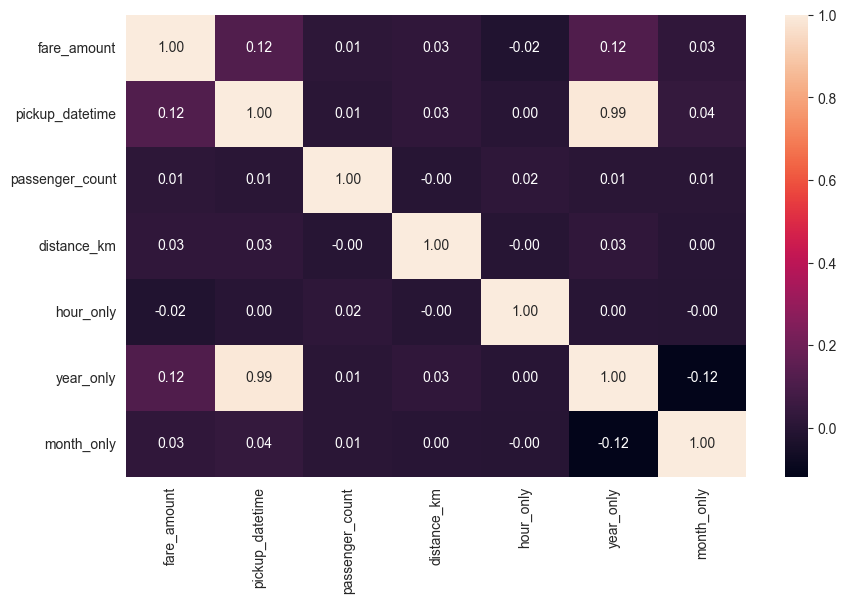

In [22]:
plt.figure(figsize=(10,6))

sns.heatmap(train_df.corr(),annot=True, fmt = '.2f')

# Regression Model Selection

In [23]:
X=train_df.drop("fare_amount",axis=1)
Y=train_df['fare_amount']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=100)

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((699946, 6), (699946,), (299977, 6), (299977,))

In [24]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [25]:
# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor

In [26]:
# Linear Regression 

logreg = LinearRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

1.6